In [1]:
from pystan import StanModel
import pystan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
d = pd.read_csv('data-aircon.txt')
data = d.to_dict('list')
data['N'] = len(d)
X_new = np.round(np.arange(d['X'].min(), d['X'].max()))
data['X_new'] = list(X_new)
data['N_new'] = len(X_new)

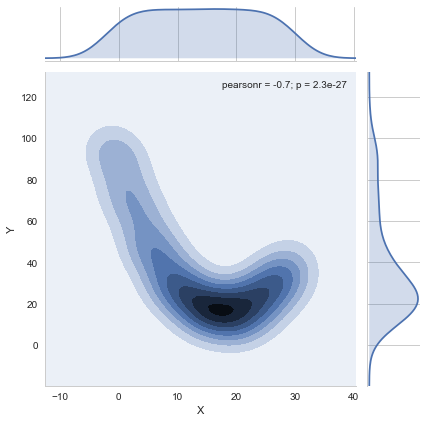

In [3]:
 sns.jointplot("X", "Y", data=d, kind='kde');

In [7]:
stanmodel = StanModel(file='model7-3.stan')

In [8]:
fit = stanmodel.sampling(data=data, seed=123, thin = 1, warmup=500, n_jobs=-1)

In [9]:
fit

Inference for Stan model: anon_model_336536b1abe4bd257e70006ec646f88d.
4 chains, each with iter=2000; warmup=500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=6000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a           14.19    0.01   0.59  13.01  13.79  14.18  14.59  15.35   3462    1.0
b            0.21  9.8e-5 5.4e-3    0.2   0.21   0.21   0.22   0.22   3052    1.0
x0          18.28  2.4e-3   0.15  17.99  18.17  18.27  18.38  18.58   3869    1.0
s_Y          5.75  4.1e-3    0.3   5.18   5.54   5.74   5.94   6.37   5563    1.0
mu[0]      103.17    0.02   1.27 100.68  102.3 103.18 104.06 105.71   4525    1.0
mu[1]      101.44    0.02   1.24  98.99 100.58 101.44  102.3 103.91   4581    1.0
mu[2]       96.32    0.02   1.15  94.03  95.54  96.33  97.12  98.61   4767    1.0
mu[3]       97.16    0.02   1.17  94.84  96.37  97.17  97.97  99.48   4734    1.0
mu[4]       96.32    0.02   1.15  94.03  95.54  96.33  97.12  98.61   4767

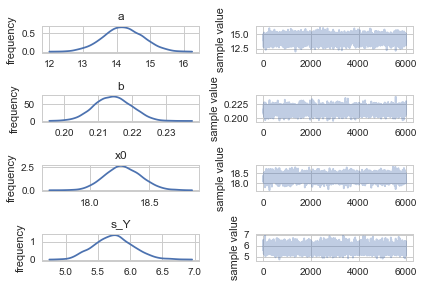

In [11]:
fit.traceplot(pars=['a', 'b','x0', 's_Y']).tight_layout()

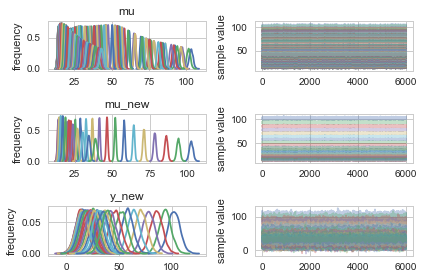

In [13]:
fit.traceplot(pars=['mu', 'mu_new', 'y_new']).tight_layout()

In [14]:
def stanfit_to_dataframe(fit):
    summary = fit.summary()
    columns = summary['summary_colnames']
    index = summary['summary_rownames']
    data = summary['summary']
    return pd.DataFrame(data, index, columns)

In [15]:
fitdf = stanfit_to_dataframe(fit)
fitdf_mu = fitdf.loc['mu_new[0]': 'mu_new[31]']
fitdf_y = fitdf.loc['y_new[0]': 'y_new[31]']

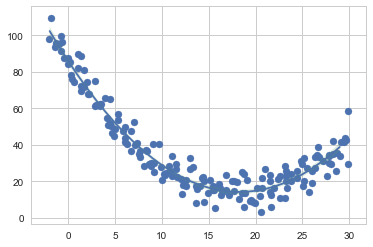

In [17]:
plt.plot(data['X_new'], fitdf_mu['mean'])
plt.scatter(data['X'], data['Y'])
plt.fill_between(data['X_new'], fitdf_mu['2.5%'],  fitdf_mu['97.5%'], alpha=0.2)
plt.fill_between(data['X_new'], fitdf_mu['25%'],  fitdf_mu['75%'], alpha=0.2)

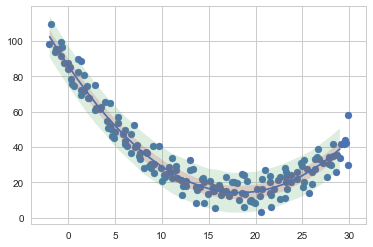

In [18]:
plt.plot(data['X_new'], fitdf_mu['mean'])
plt.scatter(data['X'], data['Y'])
plt.fill_between(data['X_new'], fitdf_y['2.5%'],  fitdf_y['97.5%'], alpha=0.2)
plt.fill_between(data['X_new'], fitdf_y['25%'],  fitdf_y['75%'], alpha=0.2)

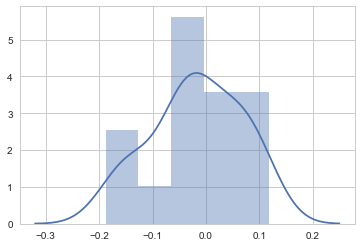

In [19]:
sns.distplot(fitdf_y['mean'].values -  fitdf_mu['mean'].values);

RuntimeError: xdata and ydata must be the same length

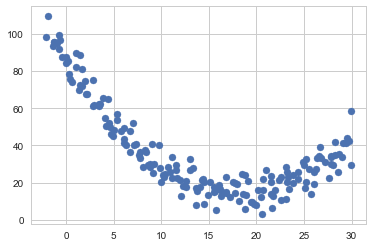

In [21]:
plt.scatter(data['X'], data['Y'])
dy_1 = fitdf_y['50%'] - fitdf_y['2.5%']
dy_2 = fitdf_y['97.5%'] - fitdf_y['50%']
x_set = np.setxor1d(np.array(d["X"]), np.array(data["X_new"]))
plt.errorbar(d[x_se], fitdf_y["mean"], yerr=[dy_1, dy_2], fmt='.');
plt.plot(np.linspace(d['X'].mix(), d['X'].max(), 50), np.linspace(d['X'].mix(), d['X'].max(), 50))

In [31]:
np.setxor1d(np.array(d["X"]), np.array(data["X_new"])) == d['X']

ValueError: Lengths must match to compare

In [ ]:
x_